In [1]:
# some plot settings
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.rcParams['text.color'] = 'black'
plt.rcParams['axes.labelcolor'] = 'black'
plt.rcParams['xtick.color'] = 'black'
plt.rcParams['ytick.color'] = 'black'
plt.rcParams['font.family'] = "CMU Serif"
plt.rcParams['figure.figsize'] = [10,6]
plt.rcParams['figure.dpi'] = 120 
plt.rc('text', usetex=True) 

In [2]:
# we will often use the tqdm progress bar
from tqdm.auto import tqdm,trange

## 18. Waiting for stoplights

Please refer to page 85-86 of [the book](https://books.google.ch/books?id=bmhuaGP3FOEC&printsec=frontcover&hl=de&source=gbs_ge_summary_r&cad=0#v=onepage&q&f=false) for the problem description.

In [4]:
import numpy as np

def stopTimes(m) :
    # m denotes the size of the grid
    sims = 10**5
    stoppingTime = 0
    for i in range(sims) :
        location = [m+1, m+1]
        while location != [1, 1] : # [x,y]
            # until the walker reaches the j=1 or k=1 lines
            while location[0] > 1 and location[1] > 1 :
                green = np.random.choice(["west","south"])
                if green == "west" :
                    location[0] -= 1
                elif green == "south" :
                    location[1] -= 1
            # if the walker is on the horizontal line k=1
            if location[0] == 1 :
                # move west 
                while location[1] > 1 :
                    light = np.random.choice(["green","red"])
                    if light == "red" :
                        stoppingTime += 1
                    location[1] -= 1
            # if the walker is on the vertical line k=1
            elif location[1] == 1 :
                # move south
                while location[0] > 1 :
                    light = np.random.choice(["green","red"])
                    if light == "red" :
                        stoppingTime += 1
                    location[0] -= 1
    return stoppingTime/sims

In [5]:
stopTimes(10)

1.75624

**CAUTION**: This can take very long to run. The computations get much slower for bigger sizes of the grid.

In [6]:
stopData = list(map(stopTimes, trange(0,100,5)))

  0%|          | 0/20 [00:00<?, ?it/s]

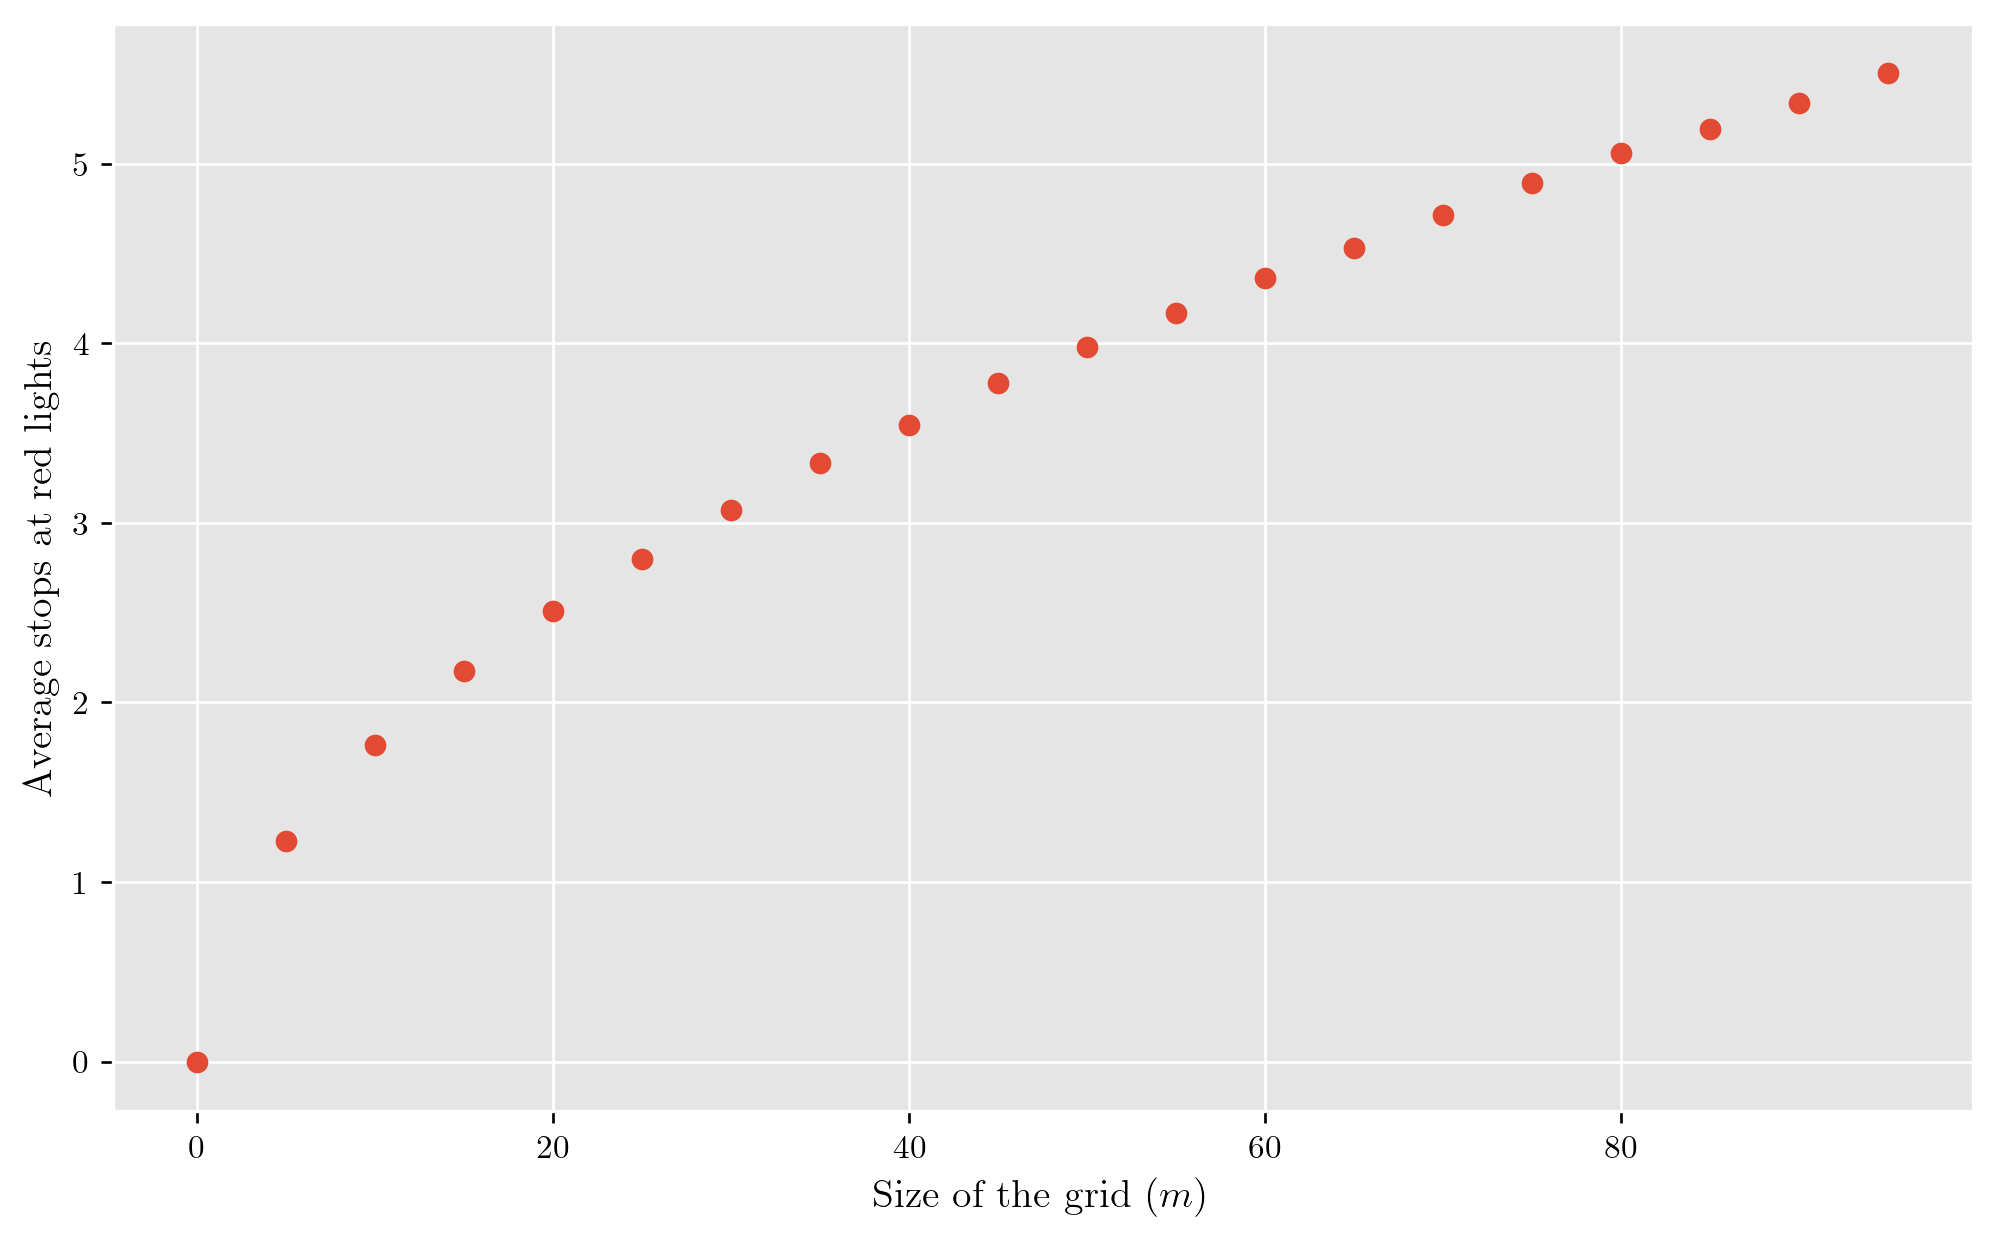

In [8]:
plt.xlabel('Size of the grid ($m$)')
plt.ylabel('Average stops at red lights')
x = range(0,100,5)
y = stopData
plt.scatter(x,y)
plt.show()